In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
#真实样本
K=3
num=600
weight=[0.2,0.4,0.4]
mean=[-2,0,1.5]
covs=[1,0.5,0.6]#标准差
Theta=np.array([weight,mean,covs])

In [3]:
aa=np.random.normal(mean[0],covs[0],int(num*weight[0]))
bb=np.random.normal(mean[1],covs[1],int(num*weight[1]))
cc=np.random.normal(mean[2],covs[2],int(num*weight[2]))

In [4]:
data=np.hstack((aa,bb,cc))

In [5]:
def normal(x,theta):
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)**2/(2*s**2))
    return result

In [6]:
def EM(X,theta,C):
    Ga=np.zeros((num,C))
    c=np.zeros(C)
    d=np.zeros(C)
    thetanext=np.zeros((3,C))
    
    for j in range(num):#响应度
        for k in range(C):
            c[k]=theta[0][k]*normal(X[j],theta[1:,k])
        Ga[j]=c/np.sum(c)

    for k in range(C):#更新参数
        d[k]=np.sum(Ga[:,k])
        thetanext[0,k]=d[k]/num
        thetanext[1,k]=np.dot(Ga[:,k],X[:])/d[k]
        thetanext[2,k]=np.sqrt(np.dot(Ga[:,k],(X[:]-theta[1,k])**2)/d[k])#标准差

    return thetanext

In [7]:
weight0=[0.2,0.3,0.3,0.4]
mean0=[-5,-2,2,5]
covs0=[1,1,1,1]
theta0=np.array([weight0,mean0,covs0])

In [23]:
weight1=[0.5,0.5]
mean1=[-2,2]
covs1=[1,1]
theta1=np.array([weight1,mean1,covs1])

weight0=[0.3,0.4,0.3]
mean0=[-5,0,5]
covs0=[1,1,1]
theta0=np.array([weight0,mean0,covs0])

In [8]:
def iterate(X,n,T0,C):
    for i in range (n):
        T0=EM(X,T0,C)
    return T0

In [9]:
Theta

array([[ 0.2,  0.4,  0.4],
       [-2. ,  0. ,  1.5],
       [ 1. ,  0.5,  0.6]])

In [15]:
Thetanew=iterate(data,500,theta0,4)
Thetanew

array([[ 0.03446251,  0.26559262,  0.44065411,  0.25929076],
       [-2.34214347, -1.22359559,  1.38885412, -0.04244614],
       [ 0.27354862,  1.35781852,  0.67109856,  0.36691796]])

x = np.linspace(-5,5,2000) # 从0到1，等分50分
y = Thetanew[0,0]*normal(x,Thetanew[1:,0])+Thetanew[0,1]*normal(x,Thetanew[1:,1])+Thetanew[0,2]*normal(x,Thetanew[1:,2])
z1 = Thetanew[0,0]*normal(x,Thetanew[1:,0])
z2 = Thetanew[0,1]*normal(x,Thetanew[1:,1])
z3 = Thetanew[0,2]*normal(x,Thetanew[1:,2])
plt.figure() # 定义一个图像窗口
plt.plot(x,y) # 绘制曲线 y
plt.plot(x,z1,linestyle='--')
plt.plot(x,z2,linestyle='--')
plt.plot(x,z3,linestyle='--')
plt.legend(['y','z1','z2','z3',])
plt.show()

In [25]:
Thetanew2=iterate(data,500,theta1,2)
Thetanew2

array([[ 0.17453634,  0.82546366],
       [-2.11000171,  0.68273905],
       [ 0.97085066,  1.00661089]])

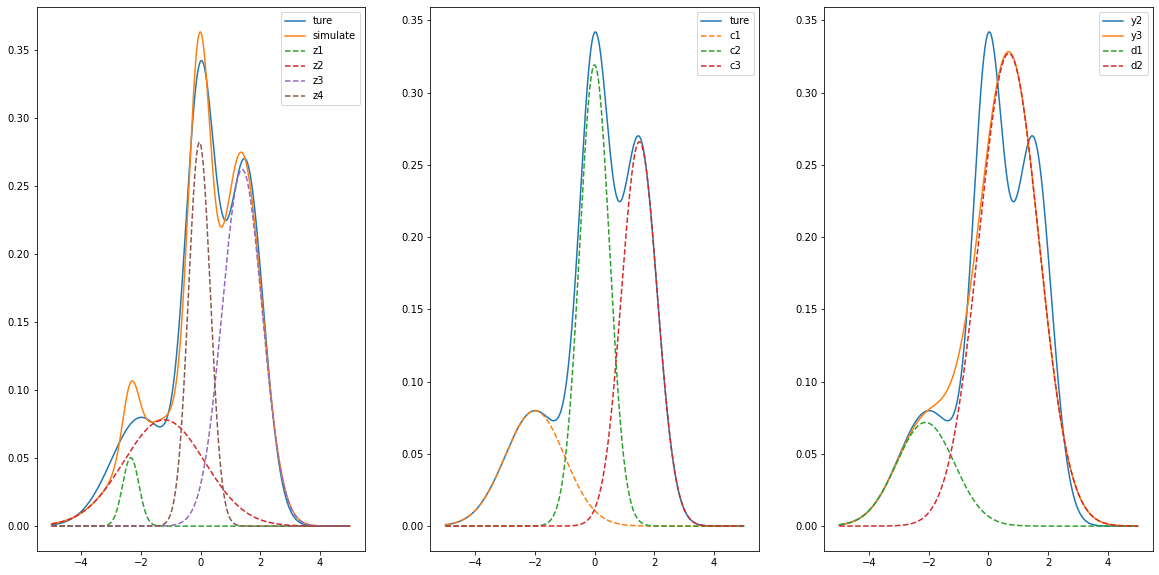

In [30]:
#四组拟合三组结果
fig = plt.figure(figsize=(20,10))
x = np.linspace(-5,5,2000) # 从0到1，等分50分

c1 = weight[0]*normal(x,Theta[1:,0])
c2 = weight[1]*normal(x,Theta[1:,1])
c3 = weight[2]*normal(x,Theta[1:,2])
y2 = c1+c2+c3

z1 = Thetanew[0,0]*normal(x,Thetanew[1:,0])
z2 = Thetanew[0,1]*normal(x,Thetanew[1:,1])
z3 = Thetanew[0,2]*normal(x,Thetanew[1:,2])
z4 = Thetanew[0,3]*normal(x,Thetanew[1:,3])
y1 = z1+z2+z3+z4

d1 = Thetanew2[0,0]*normal(x,Thetanew2[1:,0])
d2 = Thetanew2[0,1]*normal(x,Thetanew2[1:,1])
y3 = d1+d2

ax1 = fig.add_subplot(131)
ax1.plot(x,y2)
ax1.plot(x,y1) # 绘制曲线 y
ax1.plot(x,z1,linestyle='--')
ax1.plot(x,z2,linestyle='--')
ax1.plot(x,z3,linestyle='--')
ax1.plot(x,z4,linestyle='--')
ax1.legend(['ture','simulate','z1','z2','z3','z4'])

ax2 = fig.add_subplot(132)
ax2.plot(x,y2) # 绘制曲线 y
ax2.plot(x,c1,linestyle='--')
ax2.plot(x,c2,linestyle='--')
ax2.plot(x,c3,linestyle='--')
ax2.legend(['ture','c1','c2','c3',])

ax3 = fig.add_subplot(133)
ax3.plot(x,y2)
ax3.plot(x,y3) # 绘制曲线 y
ax3.plot(x,d1,linestyle='--')
ax3.plot(x,d2,linestyle='--')
ax3.legend(['y2','y3','d1','d2'])

plt.show()

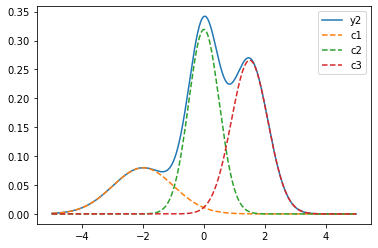

In [12]:
#原图
x = np.linspace(-5,5,2000) # 从0到1，等分50分
c1 = weight[0]*normal(x,Theta[1:,0])
c2 = weight[1]*normal(x,Theta[1:,1])
c3 = weight[2]*normal(x,Theta[1:,2])
y2 = c1+c2+c3
plt.figure() # 定义一个图像窗口
plt.plot(x,y2) # 绘制曲线 y
plt.plot(x,c1,linestyle='--')
plt.plot(x,c2,linestyle='--')
plt.plot(x,c3,linestyle='--')
plt.legend(['y2','c1','c2','c3',])
plt.show()

(array([ 3.,  6., 19., 37., 47., 48., 39., 22., 15.,  4.]),
 array([-0.18352371,  0.14262141,  0.46876653,  0.79491164,  1.12105676,
         1.44720188,  1.773347  ,  2.09949211,  2.42563723,  2.75178235,
         3.07792747]),
 <BarContainer object of 10 artists>)

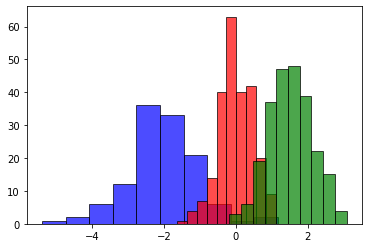

In [13]:
plt.hist(aa, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(bb, bins=10,  facecolor="red", edgecolor="black", alpha=0.7)
plt.hist(cc, bins=10, facecolor="green", edgecolor="black", alpha=0.7)